# 1. Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import json
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

In [ ]:
def load_json(fname, nrows=None):
    samples = []
    rf = open(fname, 'r', encoding='utf-8')
    for idx, line in tqdm.tqdm(enumerate(rf)):
        if nrows and idx == nrows:
            break
        try:
            samples.append(json.loads(line))
        except:
            print(idx)
    rf.close()
    return pd.DataFrame(samples)

In [ ]:
# ko đổi path này
fname = '/content/drive/MyDrive/Colab Notebooks/Nhom_4/2. Thực Hành/Visualize Data/Translated Data/entities/vi_problem_20K.json'
df = load_json(fname)
df.head()

20089it [00:00, 27883.31it/s]


,problem_id,title,content,option,answer,score,type,typetext,location,context_id,exercise_id,language
0,1730,Bài 1 Giới thiệu và Khuyến khích Ba Gia đình--...,1. Tử Chí Tông Kiến tập 1 ghi chép: Chí Huyền ...,"{'A': 'Võ thuật xuất sắc, thành thạo nghệ thuậ...","[""B""]",1.0,1,Câu hỏi trắc nghiệm,1.4,"[8045581, 8045582, 8045583]",Ex_856,Chinese
1,1731,Bài 1 Giới thiệu và Khuyến khích Ba Gia đình--...,"2. ""Zi Zhi Tong Jian"" là một cuốn sách lịch sử...","{'A': 'tiểu sử', 'B': 'niên đại', 'C': 'ghi ch...","[""B""]",1.0,1,Câu hỏi trắc nghiệm,1.4,"[8045581, 8045582, 8045583]",Ex_856,Chinese
2,1732,Bài 1 Giới thiệu và Khuyến khích Ba Gia đình--...,"3. Tên ban đầu của ""Zi Zhi Tong Jian"" là ____,...","{'A': '""Tongjian""; Song Shenzong', 'B': '""Tong...","[""D""]",1.0,1,Câu hỏi trắc nghiệm,1.4,"[8045581, 8045582, 8045583]",Ex_856,Chinese
3,1733,Bài 1 Giới thiệu và Khuyến khích Ba Gia đình--...,4. “Tam gia” trong “Tam gia chia làm Tấn” ám c...,"{'A': 'Ngụy Triệu Hàn', 'B': 'Ngụy Hán Chí', '...","[""A""]",1.0,1,Câu hỏi trắc nghiệm,1.4,"[8045581, 8045582, 8045583]",Ex_856,Chinese
4,1734,Bài 1 Giới thiệu và Khuyến khích Ba Gia đình--...,"5. Khi Trí Bá liên quân với quân Hán, quân Ngụ...","{'A': 'Hàm Đan', 'B': 'con trai cả', 'C': 'Tấn...","[""C""]",1.0,1,Câu hỏi trắc nghiệm,1.4,"[8045581, 8045582, 8045583]",Ex_856,Chinese


# 2. Khám phá dữ liệu

## 2.1. Thống kê mô tả

Ta kiểm tra một số thuộc tính cơ bản của dữ liệu:

In [ ]:
df.shape

(20089, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20089 entries, 0 to 20088
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   problem_id   20089 non-null  int64  
 1   title        20089 non-null  object 
 2   content      20080 non-null  object 
 3   option       19874 non-null  object 
 4   answer       20089 non-null  object 
 5   score        20089 non-null  float64
 6   type         20089 non-null  int64  
 7   typetext     20089 non-null  object 
 8   location     20089 non-null  object 
 9   context_id   20089 non-null  object 
 10  exercise_id  20089 non-null  object 
 11  language     20089 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.8+ MB


In [ ]:
# Hàm kiểm tra trường field_name có bao nhiêu giá trị phân biệt
def check_value_counts(df_to_check, field_name):
  print(df_to_check[field_name].value_counts())

In [ ]:
# Kiểm tra trường typetext có bao nhiêu giá trị categorical -> 5
check_value_counts(df, 'typetext')

Câu hỏi trắc nghiệm    17388
Đúng hay sai            2485
Điền vào chỗ trống       159
Câu hỏi chủ quan          56
câu hỏi biểu quyết         1
Name: typetext, dtype: int64


In [ ]:
# Kiểm tra trường type có bao nhiêu giá trị categorical -> 6
check_value_counts(df, 'type')

1    14090
2     3298
6     2485
4      159
5       56
3        1
Name: type, dtype: int64


In [ ]:
# Kiểm tra trường title có bao nhiêu giá trị categorical
check_value_counts(df, 'title')

Nhiệm vụ thứ ba                                                                                                            166
Chương 2 Kiểm tra chương                                                                                                   119
Chương 8 Kiểm tra chương                                                                                                   112
Chương 3 Kiểm tra chương                                                                                                   106
Chương 9 Bài tập về nhà                                                                                                     90
                                                                                                                          ... 
5.4 bài tập về nhà                                                                                                           1
Cấu trúc logic của báo cáo tài chính--4.1 Mối quan hệ giữa bảng cân đối kế toán và báo cáo kết quả hoạt động ki

In [ ]:
# Kiểm tra trường score có bao nhiêu giá trị categorical -> 7
check_value_counts(df, 'score')

1.0     16685
2.0      3330
10.0       56
3.0         8
4.0         7
5.0         2
17.0        1
Name: score, dtype: int64


In [ ]:
# Kiểm tra trường location có bao nhiêu giá trị categorical
check_value_counts(df, 'location')

6.5     347
4.4     331
5.5     310
4.6     296
2.6     292
       ... 
83.2      1
83.4      1
3.30      1
28.6      1
78.2      1
Name: location, Length: 458, dtype: int64


In [ ]:
# Kiểm tra trường excercise_id có bao nhiêu giá trị categorical
check_value_counts(df, 'exercise_id')

Ex_29857    119
Ex_29964    112
Ex_29871    106
Ex_30006     83
Ex_40205     80
           ... 
Ex_15271      1
Ex_25251      1
Ex_25246      1
Ex_5081       1
Ex_4643       1
Name: exercise_id, Length: 2647, dtype: int64


In [ ]:
# Kiểm tra trường language có bao nhiêu giá trị categorical
check_value_counts(df, 'language')

Chinese    15681
English     4408
Name: language, dtype: int64


Vậy các trường **type**, **typetext** và **language** là dữ liệu dạng CATEGORICAL. Nhưng ở đây có 4 loại typetext mà lại có đến 6 loại type, vậy chúng có liên quan gì với nhau không?

 **Nhận xét:** <br/>
 dữ liệu có 20089 dòng, trong đó trường **option** và **content** bị null ở một số chỗ. Ở những dòng này, câu hỏi (content) được đặt ra, ta có đáp án (answer) nhưng lại không biết nó là gì do không có option, và người làm sạch dữ liệu cũng không có cách nào trả lời và khôi phục lại các options ban đầu cho câu hỏi này, do đó ta sẽ bỏ đi các hàng không có option bởi vì những câu hỏi này không có câu trả lời, do đó không cần thiết phải tìm cách điền dữ liệu giả vào để thay thế. Xử lí tương tự với **content**.

In [ ]:
# Drop các hàng có option/content là null
df.dropna(subset=['option'], inplace=True)
df.dropna(subset=['content'], inplace=True)

In [ ]:
# Kiểm tra xem có drop đúng không (từ 20089 dòng còn 19874 dòng)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19865 entries, 0 to 20088
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   problem_id   19865 non-null  int64  
 1   title        19865 non-null  object 
 2   content      19865 non-null  object 
 3   option       19865 non-null  object 
 4   answer       19865 non-null  object 
 5   score        19865 non-null  float64
 6   type         19865 non-null  int64  
 7   typetext     19865 non-null  object 
 8   location     19865 non-null  object 
 9   context_id   19865 non-null  object 
 10  exercise_id  19865 non-null  object 
 11  language     19865 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.0+ MB


In [ ]:
check_value_counts(df, 'score')

1.0    16565
2.0     3298
5.0        2
Name: score, dtype: int64


Tiếp theo ta sẽ tính toán các thống kê cơ bản cho trường **score**

In [ ]:
# Tính trung bình, trung vị, độ lệch chuẩn, tứ phân vị
mean_score = df['score'].mean()
median_score = df['score'].median()
std_dev_score = df['score'].std()
quantiles_score = df['score'].quantile([0.25, 0.5, 0.75]).to_dict()

(mean_score, median_score, std_dev_score, quantiles_score)

(1.1664233576642336, 1.0, 0.3740879888168908, {0.25: 1.0, 0.5: 1.0, 0.75: 1.0})

Để cụ thể hơn ta sẽ vẽ histogram cho trường **score** sau khi xử lí các dữ liệu null:

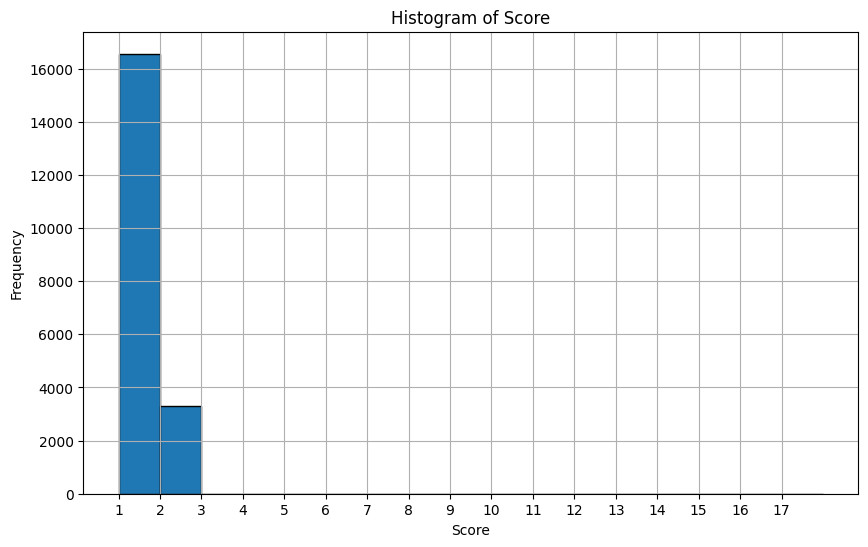

In [ ]:
# ➢Phân tích phân phối dữ liệu bằng cách sử dụng biểu đồ histogram
plt.figure(figsize=(10, 6))
df['score'].hist(bins=range(1, 19), edgecolor='black')
plt.title('Histogram of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xticks(range(1, 18))
plt.show()

Tiếp theo là histogram cho trường **language** và **type**

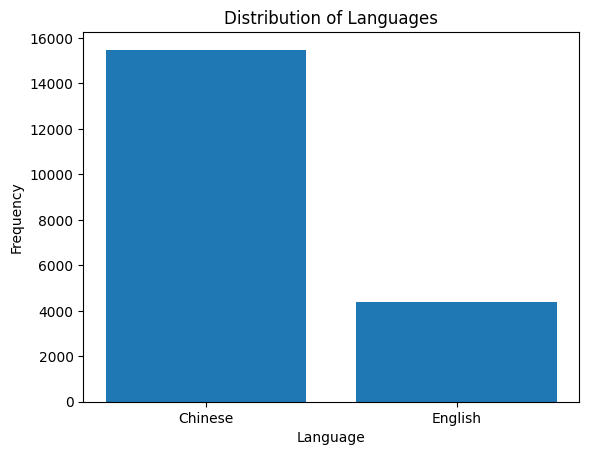

In [ ]:
# Histogram cho language
language_counts = df['language'].value_counts()

plt.bar(language_counts.index, language_counts.values)
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.title('Distribution of Languages')
plt.show()

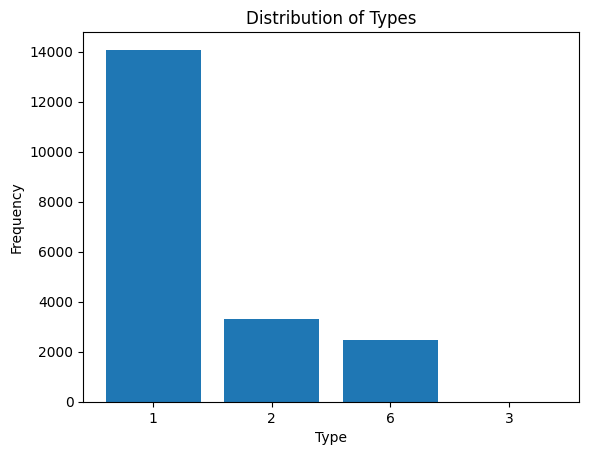

In [ ]:
# Histogram cho type
type_counts = df['type'].value_counts()

plt.bar(type_counts.index.astype(str), type_counts.values)
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.title('Distribution of Types')
plt.show()

## 2.2. Trực quan hóa dữ liệu

###2.2.1. Sử dụng các biểu đồ như scatter plot, heatmap, line plot, v.v.

In [ ]:
# ko đổi path này
fname = '/content/drive/MyDrive/Colab Notebooks/Nhom_4/2. Thực Hành/Visualize Data/Translated Data/entities/user_filtered_by_year'
df_vis = load_json(fname)
df_vis.head()

1802it [00:00, 6221.17it/s]


,id,name,gender,school,year_of_birth,course_order,enroll_time,n_courses
0,U_22,我,0.0,,2015.0,"[682129, 2294668]","[2019-10-12 10:28:02, 2020-11-21 14:03:28]",2
1,U_53,于歆杰,1.0,清华大学,1973.0,"[696679, 1704639, 943255, 1729417, 682164, 177...","[2020-03-01 21:24:30, 2020-03-12 16:17:02, 202...",8
2,U_119,刘震,1.0,清华大学,1976.0,"[801420, 676905, 735273]","[2020-02-11 16:29:04, 2020-03-03 23:12:11, 202...",3
3,U_141,Ray,0.0,清华大学,1997.0,[697821],[2020-02-07 11:14:30],1
4,U_144,杜昊天,2.0,清华大学,1996.0,[696626],[2020-03-24 06:32:38],1


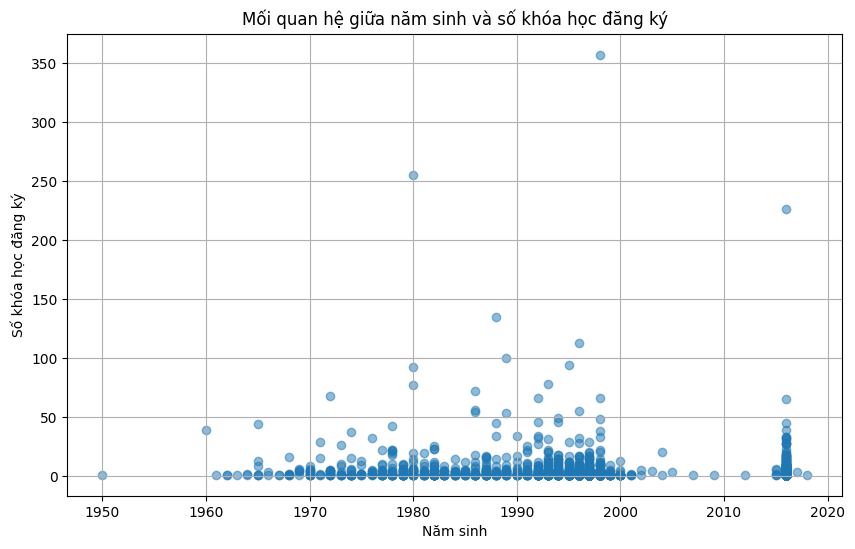

In [ ]:
# Scatter plot: Thể hiện mối quan hệ giữa năm sinh và số khóa học đăng ký.
plt.figure(figsize=(10, 6))
plt.scatter(df_vis['year_of_birth'], df_vis['n_courses'], alpha=0.5)
plt.title('Mối quan hệ giữa năm sinh và số khóa học đăng ký')
plt.xlabel('Năm sinh')
plt.ylabel('Số khóa học đăng ký')
plt.grid(True)
plt.show()

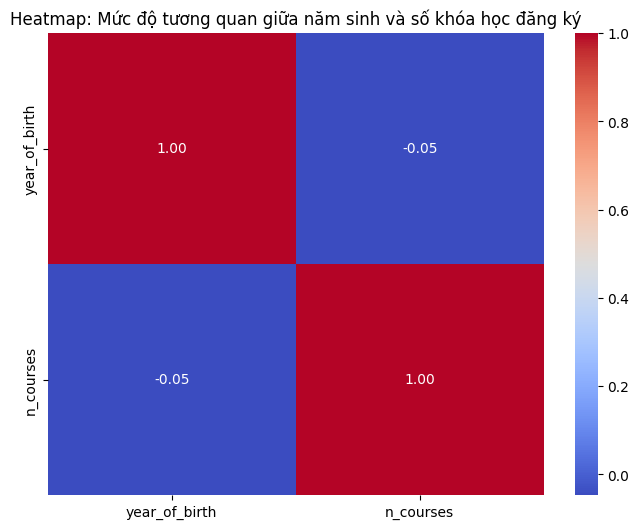

In [ ]:
# Heatmap: Thể hiện mức độ tương quan giữa các biến bằng heatmap.
correlation_matrix = df_vis[['year_of_birth', 'n_courses']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap: Mức độ tương quan giữa năm sinh và số khóa học đăng ký')
plt.show()

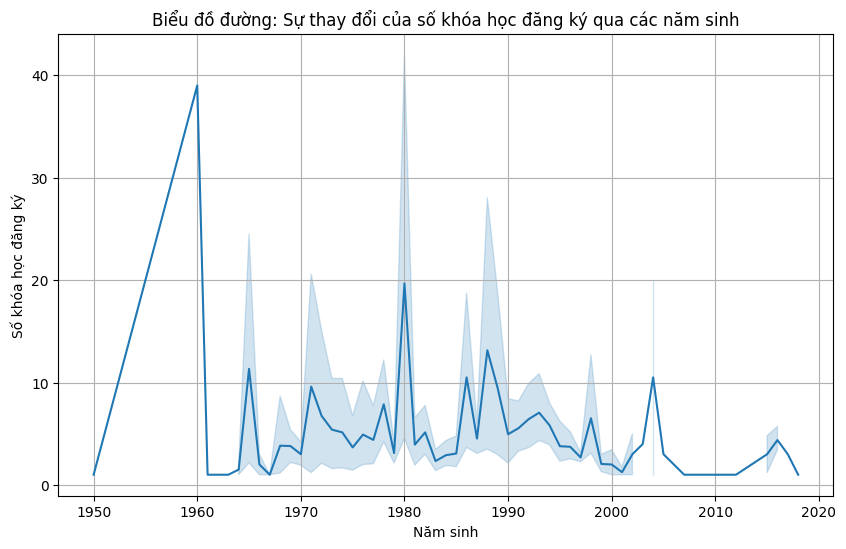

In [ ]:
# Line plot: Thể hiện sự thay đổi của số khóa học đăng ký qua các năm sinh.
plt.figure(figsize=(10, 6))
sns.lineplot(x='year_of_birth', y='n_courses', data=df_vis)
plt.title('Biểu đồ đường: Sự thay đổi của số khóa học đăng ký qua các năm sinh')
plt.xlabel('Năm sinh')
plt.ylabel('Số khóa học đăng ký')
plt.grid(True)
plt.show()

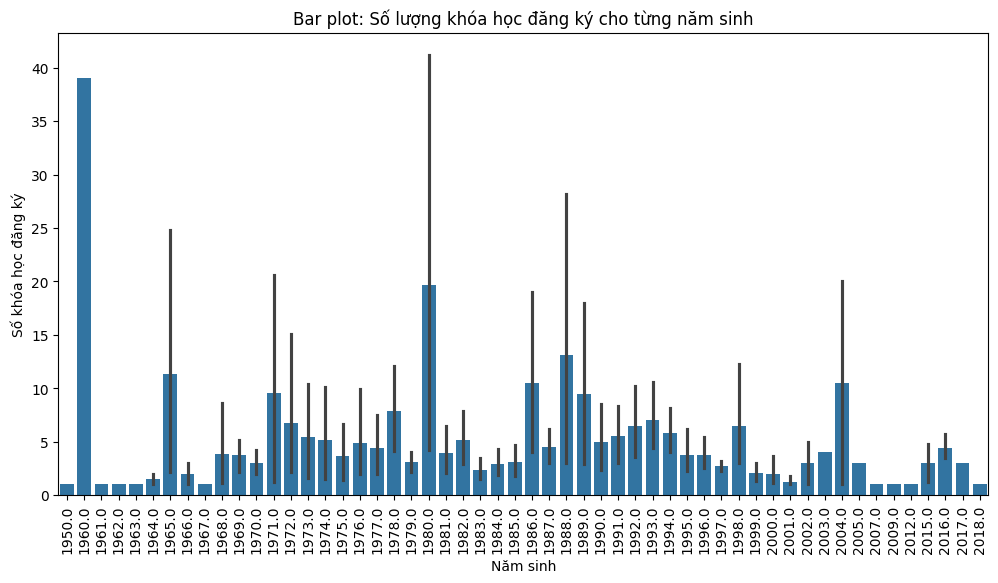

In [ ]:
# Bar plot: Thể hiện số lượng khóa học đăng ký cho từng năm sinh.
plt.figure(figsize=(12, 6))
sns.barplot(x='year_of_birth', y='n_courses', data=df_vis)
plt.title('Bar plot: Số lượng khóa học đăng ký cho từng năm sinh')
plt.xlabel('Năm sinh')
plt.ylabel('Số khóa học đăng ký')
plt.xticks(rotation=90)
plt.show()

###2.2.2. Tạo các dashboard trực quan hóa

In [ ]:
!pip -q install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 25.5 MB/s eta 0:00:00


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

# Tạo ứng dụng Dash
app = dash.Dash(__name__)

# Layout của dashboard
app.layout = html.Div([
    html.H1("Dashboard: Mối quan hệ giữa năm sinh và số khóa học đăng ký"),
    dcc.Dropdown(
        id='dropdown',
        options=[
            {'label': 'Option 1', 'value': 'value1'},
            {'label': 'Option 2', 'value': 'value2'}
        ],
        value='value1'
    ),
    dcc.Graph(id='scatter-plot'),
])

# Callback để cập nhật biểu đồ scatter plot
@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('dropdown', 'value')]
)
def update_graph(value):
    fig = px.scatter(df_vis, x='year_of_birth', y='n_courses',
                     title='Mối quan hệ giữa năm sinh và số khóa học đăng ký')
    return fig

# Chạy ứng dụng Dash
if __name__ == '__main__':
    app.run_server(debug=True)


<ipython-input-11-80e552d3deea>:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-11-80e552d3deea>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


<IPython.core.display.Javascript object>

###2.2.3. Thử nghiệm giảm chiều dữ liệu: PCA, SVD, T-SNE


Vì các phương pháp giảm chiều dữ liệu như PCA (Principal Component Analysis), SVD (Singular Value Decomposition) và t-SNE (t-distributed Stochastic Neighbor Embedding). thường được áp dụng với dữ liệu cần phải ở dạng số, không thể có các cột dữ liệu không phải số như 'name', 'school' và 'enroll_time'. Trong trường hợp này, chúng tôi sẽ bỏ một số cột dữ liệu không phải số như 'name', 'school' và 'enroll_time' trước khi áp dụng PCA, SVD hoặc t-SNE.

In [ ]:
# Loại bỏ các cột không phải số
df_numeric = df_vis.select_dtypes(include=['float64', 'int64'])

# Hiển thị DataFrame sau khi loại bỏ các cột không phải số
df_numeric.head()

,gender,year_of_birth,n_courses
0,0.0,2015.0,2
1,1.0,1973.0,8
2,1.0,1976.0,3
3,0.0,1997.0,1
4,2.0,1996.0,1


In [ ]:
from sklearn.decomposition import PCA

# Khởi tạo mô hình PCA
pca = PCA(n_components=2)

# Fit và transform dữ liệu
df_pca = pca.fit_transform(df_numeric)
df_pca = pd.DataFrame(data=df_pca, columns=['PCA_1', 'PCA_2'])

# Hiển thị dữ liệu đã giảm chiều
df_pca.head()


,PCA_1,PCA_2
0,-5.971248,16.871498
1,7.389714,-23.397347
2,1.936562,-21.332615
3,-3.759951,-1.020114
4,-3.581832,-2.006452


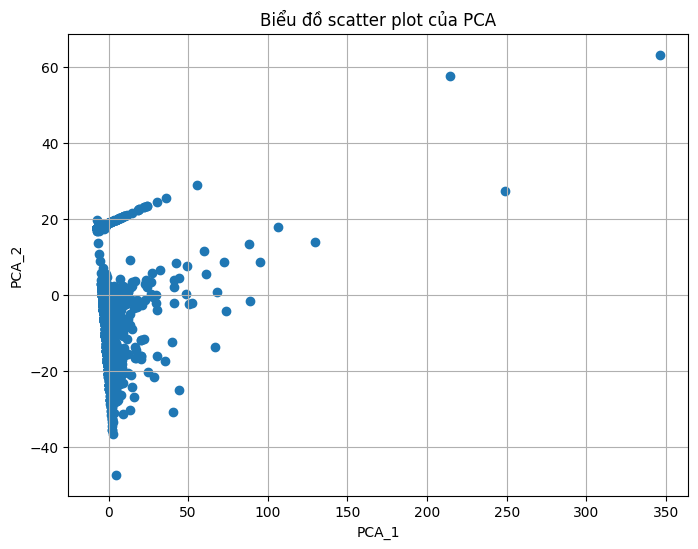

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA_1'], df_pca['PCA_2'])
plt.title('Biểu đồ scatter plot của PCA')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.grid(True)
plt.show()

**Biểu đồ scatter plot sẽ thể hiện mối quan hệ giữa các điểm dữ liệu trên hai thành phần chính của PCA**

Nhận xét:
- Phân bố dữ liệu: Các điểm dữ liệu phân bố khá hẹp, có thể thấy rằng các điểm có giá trị PCA_1 và PCA_2 nằm trong một phạm vi hẹp và lệch về phía bên trái,trải từ giá trị âm đến dương.
- Phân bố tương đối của các điểm: Có thể thấy rằng các điểm dữ liệu không phân bố đều trên không gian 2 chiều sau khi giảm chiều. Điều này có thể phản ánh sự biến động lớn trong dữ liệu gốc và việc giảm chiều không thể giữ lại toàn bộ thông tin về phân bố của dữ liệu ban đầu.

=> Có thể, các nguyên nhân trên đều có liên quan đến việc dữ liệu ở các cột thuộc tính "gender", "year_of_birth", "n_courses" không hề có liên quan hay có sự ảnh hưởng đến nhau.

In [ ]:
from sklearn.manifold import TSNE

# Khởi tạo mô hình t-SNE
tsne = TSNE(n_components=2)

# Fit và transform dữ liệu
df_tsne = tsne.fit_transform(df_numeric)
df_tsne = pd.DataFrame(data=df_tsne, columns=['tsne_1', 'tsne_2'])

# Hiển thị dữ liệu đã giảm chiều
df_tsne.head()

,tsne_1,tsne_2
0,6.699259,48.780048
1,49.292149,-11.380835
2,61.662834,-21.566883
3,-87.744240,-0.271539
4,-52.672615,-37.038338


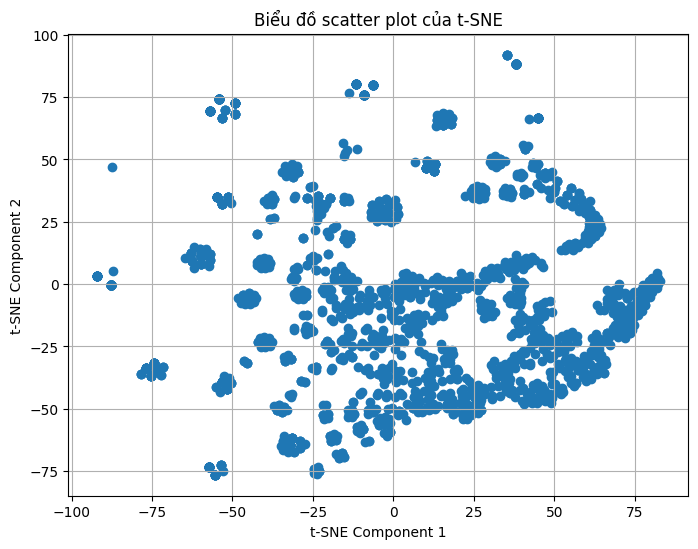

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne['tsne_1'], df_tsne['tsne_2'])
plt.title('Biểu đồ scatter plot của t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

**Biểu đồ scatter plot sẽ thể hiện mối quan hệ giữa các điểm dữ liệu trên hai thành phần chính của t-SNE**

Nhận xét:
- Phân bố dữ liệu: Các điểm dữ liệu được phân bố khá rộng và phân tán trên không gian 2 chiều sau khi giảm chiều bằng t-SNE.
- Phân bố tương đối của các điểm: Các điểm dữ liệu có phân bố không đều trên không gian 2 chiều sau khi giảm chiều bằng t-SNE. Điều này có thể phản ánh sự phức tạp của mối quan hệ giữa các điểm dữ liệu trong dữ liệu gốc.

=> Có thể, các nguyên nhân trên đều có liên quan đến việc dữ liệu ở các cột thuộc tính "gender", "year_of_birth", "n_courses" không hề có liên quan hay có sự ảnh hưởng đến nhau.

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Khởi tạo mô hình SVD
svd = TruncatedSVD(n_components=2)

# Fit và transform dữ liệu
df_svd = svd.fit_transform(df_numeric)
df_svd = pd.DataFrame(data=df_svd, columns=['svd_1', 'svd_2'])

# Hiển thị dữ liệu đã giảm chiều
df_svd.head()

,svd_1,svd_2
0,2014.998696,-2.920056
1,1973.013899,3.182641
2,1976.001681,-1.824669
3,1996.996310,-3.876102
4,1995.997160,-3.873334


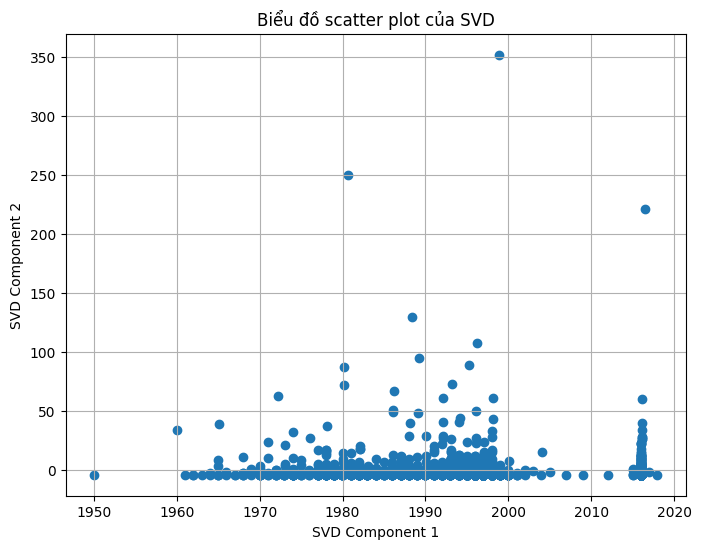

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df_svd['svd_1'], df_svd['svd_2'])
plt.title('Biểu đồ scatter plot của SVD')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.grid(True)
plt.show()

**Biểu đồ scatter plot sẽ thể hiện mối quan hệ giữa các điểm dữ liệu trên hai thành phần chính của SVD**

Nhận xét:
- Phân bố dữ liệu: Các điểm dữ liệu sau khi giảm chiều bằng SVD có phân bố rất khác biệt so với PCA hoặc t-SNE. Cụ thể, giá trị của SVD_1 chứa thông tin về năm sinh trong khi giá trị của SVD_2 không có ý nghĩa rõ ràng. Điều này thể hiện sự khác biệt trong cách SVD giảm chiều dữ liệu so với các phương pháp khác.
- Phân bố tương đối của các điểm: Các điểm dữ liệu có phân bố không đều trên không gian 2 chiều sau khi giảm chiều bằng SVD. Các giá trị SVD_1 phản ánh sự khác biệt lớn giữa các điểm dữ liệu về năm sinh trong khi SVD_2 không mang lại nhiều thông tin có ý nghĩa.

=> Có thể, các nguyên nhân trên đều có liên quan đến việc dữ liệu ở các cột thuộc tính "gender", "year_of_birth", "n_courses" không hề có liên quan hay có sự ảnh hưởng đến nhau.

## 2.3. Xử lý dữ liệu

In [ ]:
df.head()

,problem_id,title,content,option,answer,score,type,typetext,location,context_id,exercise_id,language
0,1730,Bài 1 Giới thiệu và Khuyến khích Ba Gia đình--...,1. Tử Chí Tông Kiến tập 1 ghi chép: Chí Huyền ...,"{'A': 'Võ thuật xuất sắc, thành thạo nghệ thuậ...","[""B""]",1.0,1,Câu hỏi trắc nghiệm,1.4,"[8045581, 8045582, 8045583]",Ex_856,Chinese
1,1731,Bài 1 Giới thiệu và Khuyến khích Ba Gia đình--...,"2. ""Zi Zhi Tong Jian"" là một cuốn sách lịch sử...","{'A': 'tiểu sử', 'B': 'niên đại', 'C': 'ghi ch...","[""B""]",1.0,1,Câu hỏi trắc nghiệm,1.4,"[8045581, 8045582, 8045583]",Ex_856,Chinese
2,1732,Bài 1 Giới thiệu và Khuyến khích Ba Gia đình--...,"3. Tên ban đầu của ""Zi Zhi Tong Jian"" là ____,...","{'A': '""Tongjian""; Song Shenzong', 'B': '""Tong...","[""D""]",1.0,1,Câu hỏi trắc nghiệm,1.4,"[8045581, 8045582, 8045583]",Ex_856,Chinese
3,1733,Bài 1 Giới thiệu và Khuyến khích Ba Gia đình--...,4. “Tam gia” trong “Tam gia chia làm Tấn” ám c...,"{'A': 'Ngụy Triệu Hàn', 'B': 'Ngụy Hán Chí', '...","[""A""]",1.0,1,Câu hỏi trắc nghiệm,1.4,"[8045581, 8045582, 8045583]",Ex_856,Chinese
4,1734,Bài 1 Giới thiệu và Khuyến khích Ba Gia đình--...,"5. Khi Trí Bá liên quân với quân Hán, quân Ngụ...","{'A': 'Hàm Đan', 'B': 'con trai cả', 'C': 'Tấn...","[""C""]",1.0,1,Câu hỏi trắc nghiệm,1.4,"[8045581, 8045582, 8045583]",Ex_856,Chinese


###2.3.1.  Xử lý giá trị thiếu

In [ ]:
df.isnull().sum()

problem_id     0
title          0
content        0
option         0
answer         0
score          0
type           0
typetext       0
location       0
context_id     0
exercise_id    0
language       0
dtype: int64

Vì ở mục 2.1. Thống kê mô tả, chúng tôi đã thực hiện bỏ đi các hàng không có option (những câu hỏi này không có câu trả lời, tức là chúng tôi sẽ không cần phải tìm cách điền dữ liệu giả vào để thay thế). Xử lí tương tự với content. Nên:
**Kết quả của df.isnull().sum() cho thấy không có giá trị thiếu (null) nào trong DataFrame. Mỗi cột đều có số lượng giá trị thiếu bằng 0, điều này có nghĩa là mọi cột đều có đầy đủ dữ liệu.**

###2.3.2.  Xử lý dữ liệu trùng lặp

In [ ]:
df_duplicated = df.duplicated(subset=["problem_id"])
df_duplicated

0        False
1        False
2        False
3        False
4        False
         ...  
20084    False
20085    False
20086    False
20087    False
20088    False
Length: 19865, dtype: bool

Vì tất cả các giá trị ở mỗi index đều là False nên Dataframe không có chứa bất kỳ giá trị bị trùng lặp.

###2.3.3. Xử lý dữ liệu nhiễu

####2.3.3.1. Xử lý dữ liệu nhiễu ở dạng số

In [ ]:
# Chỉ lấy các cột score, type, và location
selected_columns = ['score', 'type', 'location']
df_selected = df.loc[:, selected_columns]

df_selected.head()

,score,type,location
0,1.0,1,1.4
1,1.0,1,1.4
2,1.0,1,1.4
3,1.0,1,1.4
4,1.0,1,1.4


In [ ]:
#Thống kê tóm tắt
df_selected.describe()

,score,type
count,19865.000000,19865.000000
mean,1.166423,1.791593
std,0.374088,1.633125
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,2.000000
max,5.000000,6.000000


Lý do hàm df_selected.describe() của tôi chỉ trả về 2 cột thuộc tính là "score" và "type", trong khi dataframe df_selected lại có 3 cột thuộc tính là "score", "type" và "location" là vì: describe() chỉ tính toán thống kê mô tả cho các cột dữ liệu số, và cột thuộc tính "location" là chứa các mẫu dữ liệu ở dạng string.

**Nhận xét: Với việc chưa xử lý dữ liệu ngoại lai nên ở cột "score" có giá trị max là 5.0, tương tự cột "type" có giá trị max là 6.0**

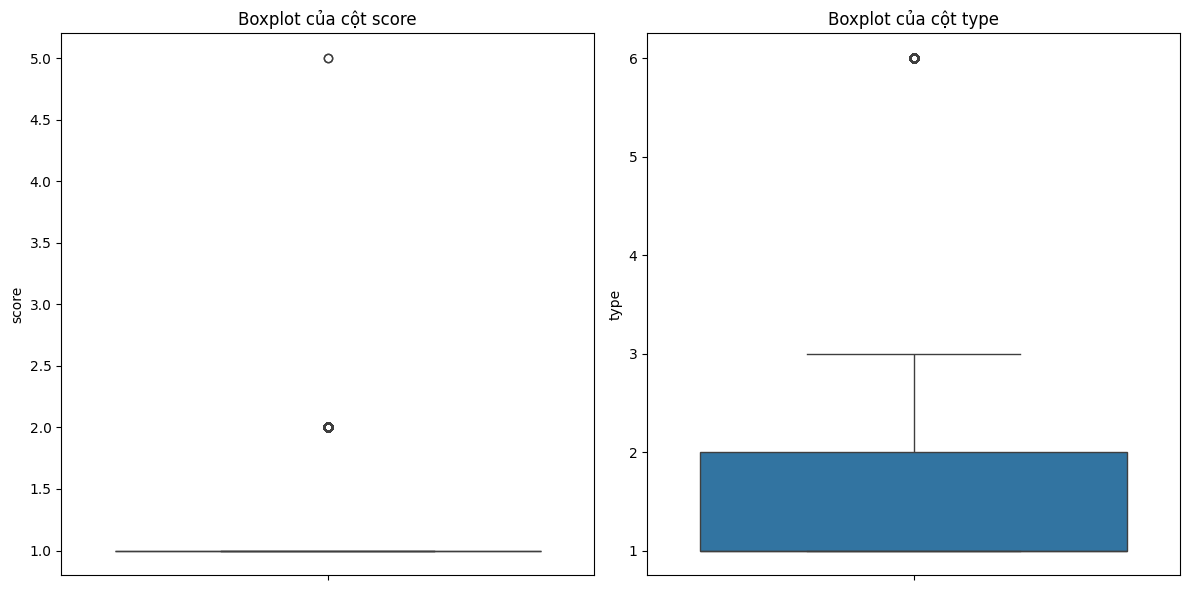

In [ ]:
# Tạo một figure với 2 subplot trên cùng một hàng
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Biểu đồ boxplot cho cột 'score'
sns.boxplot(data=df_selected['score'], ax=axes[0])
axes[0].set_title('Boxplot của cột score')
# Biểu đồ boxplot cho cột 'type'
sns.boxplot(data=df_selected['type'], ax=axes[1])
axes[1].set_title('Boxplot của cột type')
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

**Nhận xét: **
- boxplot cho cột 'score': Phân bố dữ liệu của cột "score" trong DataFrame phân bố không đồng đều và chủ yếu tập trung vào một số giá trị cụ thể
    - Giá trị 1.0 chiếm phần lớn trong dữ liệu, với số lượng rất lớn, cho thấy một sự chênh lệch lớn so với các giá trị khác.
    - Giá trị 2.0 cũng chiếm một phần nhỏ nhưng chưa đáng kể.
    - Các giá trị khác chỉ chiếm một tỷ lệ nhỏ trong dữ liệu.

=> Điều này cho thấy rằng cột "score" có một phân bố mất cân bằng, với một số giá trị xuất hiện rất ít so với giá trị khác.

- boxplot cho cột 'type': Phân bố dữ liệu của cột "type" trong DataFrame phân bố không đồng đều và chủ yếu tập trung vào một số giá trị cụ thể
    - Giá trị 1.0 và 2.0 xuất hiện nhiều nhất và phân bố đồng đều.
    - Giá trị 3.0 cũng chiếm một phần nhỏ nhưng chưa đáng kể.
    - Các giá trị khác chỉ chiếm một tỷ lệ nhỏ trong dữ liệu.

=> Điều này cho thấy rằng cột "type" cũng bị mất cân bằng, với một số giá trị xuất hiện rất ít so với giá trị khác.



In [ ]:
# Tính giá trị trung vị của cột 'type' và 'score'
type_median = df_selected['type'].median()
score_median = df_selected['score'].median()

# Thay thế giá trị ngoại lai bằng giá trị trung bình
df_selected['type'] = df_selected['type'].replace(6, type_median)
df_selected['score'] = df_selected['score'].replace(5, score_median)

# Kiểm tra lại giá trị sau khi thay thế
print(df_selected['type'].value_counts())
print(df_selected['score'].value_counts())


1    16566
2     3298
3        1
Name: type, dtype: int64
1.0    16567
2.0     3298
Name: score, dtype: int64


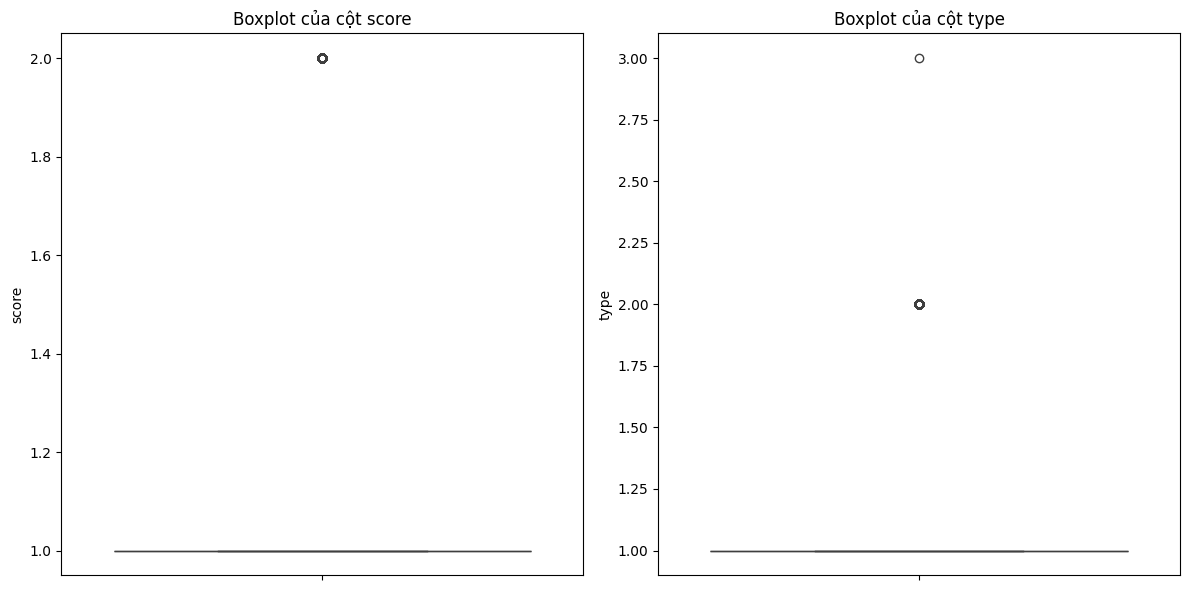

In [ ]:
# Tạo một figure với 2 subplot trên cùng một hàng
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Biểu đồ boxplot cho cột 'score'
sns.boxplot(data=df_selected['score'], ax=axes[0])
axes[0].set_title('Boxplot của cột score')

# Biểu đồ boxplot cho cột 'type'
sns.boxplot(data=df_selected['type'], ax=axes[1])
axes[1].set_title('Boxplot của cột type')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Khởi tạo một StandardScaler
scaler = StandardScaler()

# Fit và chuyển đổi dữ liệu
df_scaled = scaler.fit_transform(df_selected)

# Tạo DataFrame mới từ dữ liệu đã chuẩn hóa
df_scaled = pd.DataFrame(df_scaled, columns=df_selected.columns)

# In ra một số dòng đầu của DataFrame đã chuẩn hóa
df_scaled.head()

,score,type,location
0,-0.446173,-0.446173,-0.870722
1,-0.446173,-0.446173,-0.870722
2,-0.446173,-0.446173,-0.870722
3,-0.446173,-0.446173,-0.870722
4,-0.446173,-0.446173,-0.870722


####2.3.3.2. Xử lý dữ liệu nhiễu ở dạng chuỗi

In [ ]:
!pip install -q emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 5.9 MB/s eta 0:00:00


In [ ]:
# https://github.com/nguyenvanhieuvn/text-classification-tutorial/blob/master/text_classification_tutorial.ipynb
# https://nguyenvanhieu.vn/phan-loai-van-ban-tieng-viet

import regex as re
import string
import emoji

from nltk import flatten


# Remove HTML code
def remove_HTML(text):
    return re.sub(r'<[^>]*>', '', text)


# Standardize unicode
def convert_unicode(text):
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'
    charutf8 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'
    char1252 = char1252.split('|')
    charutf8 = charutf8.split('|')

    dic = {}
    for i in range(len(char1252)): dic[char1252[i]] = charutf8[i]
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dic[x.group()], text
    )


# Standardize accent typing
vowels_to_ids = {}
vowels_table = [
    ['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a' ],
    ['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
    ['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
    ['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e' ],
    ['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
    ['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i' ],
    ['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o' ],
    ['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'oo'],
    ['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
    ['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u' ],
    ['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
    ['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y' ]
]

for i in range(len(vowels_table)):
    for j in range(len(vowels_table[i]) - 1):
        vowels_to_ids[vowels_table[i][j]] = (i, j)


def is_valid_vietnamese_word(word):
    chars = list(word)
    vowel_indexes = -1
    for index, char in enumerate(chars):
        x, y = vowels_to_ids.get(char, (-1, -1))
        if x != -1:
            if vowel_indexes == -1: vowel_indexes = index
            else:
                if index - vowel_indexes != 1: return False
                vowel_indexes = index
    return True


def standardize_word_typing(word):
    if not is_valid_vietnamese_word(word): return word
    chars = list(word)
    dau_cau = 0
    vowel_indexes = []
    qu_or_gi = False

    for index, char in enumerate(chars):
        x, y = vowels_to_ids.get(char, (-1, -1))
        if x == -1: continue
        elif x == 9:  # check qu
            if index != 0 and chars[index - 1] == 'q':
                chars[index] = 'u'
                qu_or_gi = True
        elif x == 5:  # check gi
            if index != 0 and chars[index - 1] == 'g':
                chars[index] = 'i'
                qu_or_gi = True

        if y != 0:
            dau_cau = y
            chars[index] = vowels_table[x][0]

        if not qu_or_gi or index != 1:
            vowel_indexes.append(index)

    if len(vowel_indexes) < 2:
        if qu_or_gi:
            if len(chars) == 2:
                x, y = vowels_to_ids.get(chars[1])
                chars[1] = vowels_table[x][dau_cau]
            else:
                x, y = vowels_to_ids.get(chars[2], (-1, -1))
                if x != -1: chars[2] = vowels_table[x][dau_cau]
                else: chars[1] = vowels_table[5][dau_cau] if chars[1] == 'i' else vowels_table[9][dau_cau]
            return ''.join(chars)
        return word

    for index in vowel_indexes:
        x, y = vowels_to_ids[chars[index]]
        if x == 4 or x == 8:  # ê, ơ
            chars[index] = vowels_table[x][dau_cau]
            return ''.join(chars)

    if len(vowel_indexes) == 2:
        if vowel_indexes[-1] == len(chars) - 1:
            x, y = vowels_to_ids[chars[vowel_indexes[0]]]
            chars[vowel_indexes[0]] = vowels_table[x][dau_cau]
        else:
            x, y = vowels_to_ids[chars[vowel_indexes[1]]]
            chars[vowel_indexes[1]] = vowels_table[x][dau_cau]
    else:
        x, y = vowels_to_ids[chars[vowel_indexes[1]]]
        chars[vowel_indexes[1]] = vowels_table[x][dau_cau]
    return ''.join(chars)


def standardize_sentence_typing(text):
    words = text.lower().split()
    for index, word in enumerate(words):
        cw = re.sub(r'(^\p{P}*)([p{L}.]*\p{L}+)(\p{P}*$)', r'\1/\2/\3', word).split('/')
        if len(cw) == 3: cw[1] = standardize_word_typing(cw[1])
        words[index] = ''.join(cw)
    return ' '.join(words)


def normalize_acronyms(text):
    words = []
    for word in text.strip().split():
        # word = word.strip(string.punctuation)
        if word.lower() not in replace_list.keys(): words.append(word)
        else: words.append(replace_list[word.lower()])
    return emoji.demojize(' '.join(words)) # Remove Emojis


# Word segmentation
# annotator = VnCoreNLP('VnCoreNLP/VnCoreNLP-1.1.1.jar')
# def word_segmentation(text):
#     words = annotator.tokenize(text)
#     return ' '.join(word for word in flatten(words))


# Remove unnecessary characters
def remove_unnecessary_characters(text):
    text = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđÁÀẢÃẠĂẮẰẲẴẶÂẤẦẨẪẬÉÈẺẼẸÊẾỀỂỄỆÓÒỎÕỌÔỐỒỔỖỘƠỚỜỞỠỢÍÌỈĨỊÚÙỦŨỤƯỨỪỬỮỰÝỲỶỸỴĐ_]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra whitespace
    return text

In [ ]:
def text_preprocess(text):
    text = remove_HTML(text)
    text = convert_unicode(text)
    # text = standardize_sentence_typing(text)
    text = normalize_acronyms(text)
    #text = word_segmentation(text) # When use PhoBERT
    text = remove_unnecessary_characters(text)
    # return text.lower()
    return text

In [ ]:
df['title'] = df['title'].apply(text_preprocess)
df.head()

,problem_id,title,content,option,answer,score,type,typetext,location,context_id,exercise_id,language
0,1730,Bài 1 Giới thiệu và Khuyến khích Ba Gia đình B...,1. Tử Chí Tông Kiến tập 1 ghi chép: Chí Huyền ...,"{'A': 'Võ thuật xuất sắc, thành thạo nghệ thuậ...","[""B""]",1.0,1,Câu hỏi trắc nghiệm,1.4,"[8045581, 8045582, 8045583]",Ex_856,Chinese
1,1731,Bài 1 Giới thiệu và Khuyến khích Ba Gia đình B...,"2. ""Zi Zhi Tong Jian"" là một cuốn sách lịch sử...","{'A': 'tiểu sử', 'B': 'niên đại', 'C': 'ghi ch...","[""B""]",1.0,1,Câu hỏi trắc nghiệm,1.4,"[8045581, 8045582, 8045583]",Ex_856,Chinese
2,1732,Bài 1 Giới thiệu và Khuyến khích Ba Gia đình B...,"3. Tên ban đầu của ""Zi Zhi Tong Jian"" là ____,...","{'A': '""Tongjian""; Song Shenzong', 'B': '""Tong...","[""D""]",1.0,1,Câu hỏi trắc nghiệm,1.4,"[8045581, 8045582, 8045583]",Ex_856,Chinese
3,1733,Bài 1 Giới thiệu và Khuyến khích Ba Gia đình B...,4. “Tam gia” trong “Tam gia chia làm Tấn” ám c...,"{'A': 'Ngụy Triệu Hàn', 'B': 'Ngụy Hán Chí', '...","[""A""]",1.0,1,Câu hỏi trắc nghiệm,1.4,"[8045581, 8045582, 8045583]",Ex_856,Chinese
4,1734,Bài 1 Giới thiệu và Khuyến khích Ba Gia đình B...,"5. Khi Trí Bá liên quân với quân Hán, quân Ngụ...","{'A': 'Hàm Đan', 'B': 'con trai cả', 'C': 'Tấn...","[""C""]",1.0,1,Câu hỏi trắc nghiệm,1.4,"[8045581, 8045582, 8045583]",Ex_856,Chinese


###2.3.4. Xử lý dữ liệu không nhất quán

In [ ]:
# Kiểm tra kiểu dữ liệu của các cột trong DataFrame
df_selected.dtypes

score       float64
type        float64
location     object
dtype: object

Nhận thấy dữ liệu ở cột "location" chủ yếu có dữ liệu ở dạng object(string), tuy nhiên các dữ liệu này đều có kiểu có thể ép về dạng float [6.5, 4.4, 5.5, ...] nên chúng tôi sẽ thử ép dữ liệu ở cột này về dạng float thử.

In [ ]:
# Ép kiểu dữ liệu của cột 'location' về float64
df_selected['location'] = df_selected['location'].astype('float64')

# Kiểm tra lại kiểu dữ liệu của các cột
df_selected.dtypes

score       float64
type        float64
location    float64
dtype: object

In [ ]:
# Tạo bảng dữ liệu tham chiếu
reference_table = df[['type', 'typetext']].drop_duplicates().set_index('type')

# Lấy ra các giá trị khác nhau trong cột 'type'
unique_types = df['type'].unique()

# Tạo một dictionary để lưu trữ các giá trị tương ứng
type_to_typetext = {}

# Lặp qua các giá trị duy nhất trong cột 'type' và lưu vào dictionary
for type_value in unique_types:
    typetext_value = reference_table.loc[type_value, 'typetext']
    type_to_typetext[type_value] = typetext_value
    print(f"Giá trị '{type_value}' trong cột 'type' tương ứng với giá trị '{reference_table.loc[type_value, 'typetext']}' trong cột 'typetext'.")

# In ra dictionary
type_to_typetext

Giá trị '1' trong cột 'type' tương ứng với giá trị 'Câu hỏi trắc nghiệm' trong cột 'typetext'.
Giá trị '6' trong cột 'type' tương ứng với giá trị 'Đúng hay sai' trong cột 'typetext'.
Giá trị '2' trong cột 'type' tương ứng với giá trị 'Câu hỏi trắc nghiệm' trong cột 'typetext'.
Giá trị '3' trong cột 'type' tương ứng với giá trị 'câu hỏi biểu quyết' trong cột 'typetext'.


{1: 'Câu hỏi trắc nghiệm',
 6: 'Đúng hay sai',
 2: 'Câu hỏi trắc nghiệm',
 3: 'câu hỏi biểu quyết'}

In [ ]:
# Thử ánh xạ các giá trị không nhất quán thành giá trị hợp lệ.
df_selected['typetext_mapping'] = df_selected['type'].map(type_to_typetext)

# In ra một số dòng của DataFrame để kiểm tra kết quả
df_selected.head(-5)

,score,type,location,typetext_mapping
0,1.0,1.0,1.4,Câu hỏi trắc nghiệm
1,1.0,1.0,1.4,Câu hỏi trắc nghiệm
2,1.0,1.0,1.4,Câu hỏi trắc nghiệm
3,1.0,1.0,1.4,Câu hỏi trắc nghiệm
4,1.0,1.0,1.4,Câu hỏi trắc nghiệm
...,...,...,...,...
20079,1.0,1.0,12.5,Câu hỏi trắc nghiệm
20080,1.0,1.0,12.5,Câu hỏi trắc nghiệm
20081,1.0,1.0,12.5,Câu hỏi trắc nghiệm
20082,1.0,1.0,12.5,Câu hỏi trắc nghiệm


## 2.4. Phân tích thống kê

Trong phần này, nhóm sẽ sử dụng bảng user (user.json) phân tích, cụ thể:
- Kiểm định: Giới tính và số lượng khóa học đăng ký
- Tương quan, ML: Năm sinh và số lượng khóa học đăng ký

### 2.4.1. Kiểm định giả thuyết

In [ ]:
fname = '/content/drive/MyDrive/Colab Notebooks/Nhom_4/2. Thực Hành/Visualize Data/Data/entities/user.json'
df = load_json(fname)
df.head()

3330294it [01:08, 48496.49it/s] 


,id,name,gender,school,year_of_birth,course_order,enroll_time
0,U_22,我,0.0,,2015.0,"[682129, 2294668]","[2019-10-12 10:28:02, 2020-11-21 14:03:28]"
1,U_24,王帅国,1.0,清华大学,6558.0,"[597214, 605512, 597211, 597314, 597208, 62950...","[2019-05-20 16:06:48, 2019-05-24 19:34:43, 201..."
2,U_25,王帅国,0.0,清华大学,NaN,[1903985],[2020-08-07 18:59:13]
3,U_53,于歆杰,1.0,清华大学,1973.0,"[696679, 1704639, 943255, 1729417, 682164, 177...","[2020-03-01 21:24:30, 2020-03-12 16:17:02, 202..."
4,U_54,马昱春,2.0,清华大学,NaN,"[682442, 682164, 1748240, 1778890, 1829031, 17...","[2019-10-09 02:17:49, 2019-11-08 00:49:03, 202..."


In [ ]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3330294 entries, 0 to 3330293
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             3330294 non-null  object 
 1   name           3330240 non-null  object 
 2   gender         3330240 non-null  float64
 3   school         3330240 non-null  object 
 4   year_of_birth  48530 non-null    float64
 5   course_order   3330294 non-null  object 
 6   enroll_time    3330294 non-null  object 
dtypes: float64(2), object(5)
memory usage: 177.9+ MB


In [ ]:
df['gender'].value_counts()

0.0      1221931
1.0      1067858
2.0      1040449
232.0          1
3.0            1
Name: gender, dtype: int64

In [ ]:
# Lọc các hàng có gender 0, 1, 2
df_filtered = df[['id', 'school', 'gender', 'course_order']]
df_filtered = df_filtered.query("gender in (0, 1, 2)")

# Bổ sung cột n_courses
df_filtered['n_courses'] = df_filtered['course_order'].map(len)

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3330238 entries, 0 to 3330293
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            object 
 1   school        object 
 2   gender        float64
 3   course_order  object 
 4   n_courses     int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 152.4+ MB


In [ ]:
# Kiểm định t cho 2 mẫu độc lập
# Số khóa học đăng ký trung bình giữa 2 nhóm giới tính 0 và 1 có bằng nhau hay không ?
# Giả thuyết null: Số khóa học trung bình 0 - Số khóa học trung bình 1 = 0
# Giả thuyết đối: Số khóa học trung bình 0 - Số khóa học trung bình 1 != 0

import statsmodels
import statsmodels.api as sm

# Nhóm theo loại giới tính
groups = df_filtered.groupby('gender')
n_courses_0 = groups.get_group(0)['n_courses']
n_courses_1 = groups.get_group(1)['n_courses']

# Kiểm định
t, p, degfree = statsmodels.stats.weightstats.ttest_ind(n_courses_0, n_courses_1,
                                        alternative='two-sided',
                                        usevar='pooled', value=0)

print(f'Thống kê t  : {t}')
print(f'p-value     : {p}')
print(f'bậc tự do   : {degfree}')

Thống kê t  : 158.33597655616535
p-value     : 0.0
bậc tự do   : 2289787.0


p-value < 0.05 --> Số lượng khóa học đăng ký trung bình giữa 2 nhóm giới tính là khác nhau.
Nguồn:
- https://www.google.com/search?q=ki%E1%BB%83m+%C4%91%E1%BB%8Bnh+t+test+cho+m%E1%BA%ABu+%C4%91%E1%BB%99c+l%E1%BA%ADp&sca_esv=1114ab6409594670&rlz=1C1GCEA_enVN1098VN1098&biw=920&bih=694&tbm=vid&sxsrf=ACQVn09MhhwB1lvHfu9oGm6q9Y-EPb7hhw%3A1710247649553&ei=4U7wZeaqIa-x0-kP7peyKA&oq=ki%E1%BB%83m+%C4%91%E1%BB%8Bnh+t+cho+2+m%E1%BA%ABu+%C4%91%E1%BB%99c+l%E1%BA%ADp&gs_lp=Eg1nd3Mtd2l6LXZpZGVvIilraeG7g20gxJHhu4tuaCB0IGNobyAyIG3huqt1IMSR4buZYyBs4bqtcCoCCAAyCxAAGIAEGIAEGKIEMgsQABiABBiABBiiBDILEAAYgAQYgAQYogRIjRlQAFgAcAB4AJABAJgB5ASgAeQEqgEDNS0xuAEByAEAmAIBoALoBJgDAIgGAZIHAzUtMaAHnQM&sclient=gws-wiz-video#fpstate=ive&vld=cid:422d490f,vid:Yu9uK52i9OE,st:0
- https://trithuccongdong.net/tai-lieu-spss/kiem-dinh-t-test-trong-spss.html

In [ ]:
# Phân tích phương sai (ANOVA)
# Kiểm định xem nhóm giới tính có ảnh hưởng đến số lượng khóa học đăng ký hay không
# Giả thuyết null: Nhóm giới tính không ảnh hưởng
# Giả thuyết đối: Nhóm giới tính có ảnh hưởng

n_courses_0 = groups.get_group(0)['n_courses']
n_courses_1 = groups.get_group(1)['n_courses']
n_courses_2 = groups.get_group(2)['n_courses']

f, p = scipy.stats.f_oneway(n_courses_0, n_courses_1, n_courses_2)
print(f'Thống kê f  : {f}')
print(f'p-value     : {p}')

Thống kê f  : 24877.043296423166
p-value     : 0.0


p-value < 0.05 --> Có sự khác nhau với số lượng khóa học đăng ký giữa 3 nhóm giới tính

In [ ]:
# Kiểm định t cho 2 mẫu ghép đôi

In [ ]:
# Kiểm định chi bình

In [ ]:
# Kiểm định Mann-Whitney

### 2.4.2. Tương quan

Xem dữ liệu

In [ ]:
df.head()

,id,name,gender,school,year_of_birth,course_order,enroll_time
0,U_22,我,0.0,,2015.0,"[682129, 2294668]","[2019-10-12 10:28:02, 2020-11-21 14:03:28]"
1,U_24,王帅国,1.0,清华大学,6558.0,"[597214, 605512, 597211, 597314, 597208, 62950...","[2019-05-20 16:06:48, 2019-05-24 19:34:43, 201..."
2,U_25,王帅国,0.0,清华大学,NaN,[1903985],[2020-08-07 18:59:13]
3,U_53,于歆杰,1.0,清华大学,1973.0,"[696679, 1704639, 943255, 1729417, 682164, 177...","[2020-03-01 21:24:30, 2020-03-12 16:17:02, 202..."
4,U_54,马昱春,2.0,清华大学,NaN,"[682442, 682164, 1748240, 1778890, 1829031, 17...","[2019-10-09 02:17:49, 2019-11-08 00:49:03, 202..."


In [ ]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3330294 entries, 0 to 3330293
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             3330294 non-null  object 
 1   name           3330240 non-null  object 
 2   gender         3330240 non-null  float64
 3   school         3330240 non-null  object 
 4   year_of_birth  48530 non-null    float64
 5   course_order   3330294 non-null  object 
 6   enroll_time    3330294 non-null  object 
dtypes: float64(2), object(5)
memory usage: 177.9+ MB


Xét cột year_of_birth:
- Số lượng hàng có giá trị là 48530 --> rất ít so với số lượng học sinh
- Có hàng có giá trị không hợp lệ. Ví dụ: user có id để year_of_birth là 6558

--> Để tiến hành demo, nhóm sẽ bỏ qua các hàng không có giá trị và nếu có thì chỉ chấp nhận nếu 1950 <= year_of_birth <= 2018

In [ ]:
df_filtered = df[df['year_of_birth'].between(1950, 2018)]
df_filtered.head()

,id,name,gender,school,year_of_birth,course_order,enroll_time
0,U_22,我,0.0,,2015.0,"[682129, 2294668]","[2019-10-12 10:28:02, 2020-11-21 14:03:28]"
3,U_53,于歆杰,1.0,清华大学,1973.0,"[696679, 1704639, 943255, 1729417, 682164, 177...","[2020-03-01 21:24:30, 2020-03-12 16:17:02, 202..."
14,U_119,刘震,1.0,清华大学,1976.0,"[801420, 676905, 735273]","[2020-02-11 16:29:04, 2020-03-03 23:12:11, 202..."
18,U_141,Ray,0.0,清华大学,1997.0,[697821],[2020-02-07 11:14:30]
19,U_144,杜昊天,2.0,清华大学,1996.0,[696626],[2020-03-24 06:32:38]


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1802 entries, 0 to 86119
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1802 non-null   object 
 1   name           1802 non-null   object 
 2   gender         1802 non-null   float64
 3   school         1802 non-null   object 
 4   year_of_birth  1802 non-null   float64
 5   course_order   1802 non-null   object 
 6   enroll_time    1802 non-null   object 
dtypes: float64(2), object(5)
memory usage: 112.6+ KB


In [ ]:
# Thêm cột số lượng khóa học đăng ký
df_filtered['n_courses'] = df_filtered['course_order'].map(len)
df_filtered.head()

<ipython-input-15-356e6f38330f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['n_courses'] = df_filtered['course_order'].map(len)


,id,name,gender,school,year_of_birth,course_order,enroll_time,n_courses
0,U_22,我,0.0,,2015.0,"[682129, 2294668]","[2019-10-12 10:28:02, 2020-11-21 14:03:28]",2
3,U_53,于歆杰,1.0,清华大学,1973.0,"[696679, 1704639, 943255, 1729417, 682164, 177...","[2020-03-01 21:24:30, 2020-03-12 16:17:02, 202...",8
14,U_119,刘震,1.0,清华大学,1976.0,"[801420, 676905, 735273]","[2020-02-11 16:29:04, 2020-03-03 23:12:11, 202...",3
18,U_141,Ray,0.0,清华大学,1997.0,[697821],[2020-02-07 11:14:30],1
19,U_144,杜昊天,2.0,清华大学,1996.0,[696626],[2020-03-24 06:32:38],1


In [ ]:
# df_filtered.to_json('/content/drive/MyDrive/Colab Notebooks/Nhom_4/2. Thực Hành/Visualize Data/Translated Data/entities/user_filtered_by_year',
#                     lines=True, orient='records', force_ascii=False)

Text(0.5, 1.0, 'Visualization of relation between Year and Number of courses')

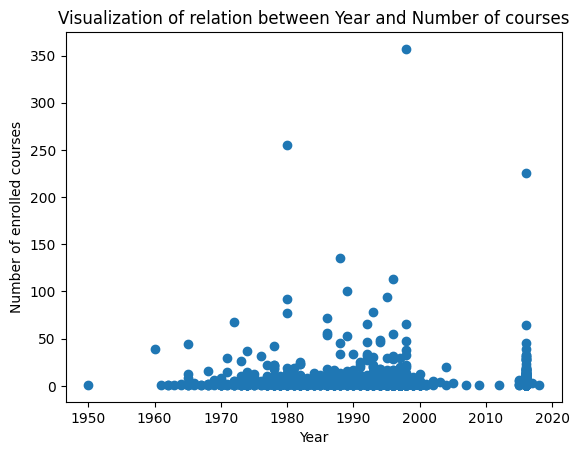

In [ ]:
plt.scatter(df_filtered['year_of_birth'], df_filtered['n_courses'])
plt.xlabel('Year')
plt.ylabel('Number of enrolled courses')
plt.title('Visualization of relation between Year and Number of courses')

In [ ]:
# Hệ số tương quan Pearson
# Giả thuyết null: Không có tương quan giữa năm sinh và số lượng khóa học đăng ký
# Giả thuyết đối: Có tương quan giữa năm sinh và số lượng khóa học
r, p = scipy.stats.pearsonr(df_filtered['year_of_birth'], df_filtered['n_courses'], alternative='two-sided')
print(f'Hệ số tương quan r  : {r}')
print(f'P-value             : {p}')

Hệ số tương quan r  : -0.046814073990812784
P-value             : 0.04692610933685062


Xét biến "năm sinh" và "số lượng khóa học đăng ký":
- p-value < 0.05 --> Có sự tương quan tuyến tính giữa 2 biến
- Hệ số tương quan r gần bằng 0 --> Tương quan tuyến tính rất yếu

Nguồn: https://thongke.cesti.gov.vn/dich-vu-thong-ke/tai-lieu-phan-tich-thong-ke/861-thong-ke-mo-ta-trong-nghien-cuu-dai-luong-tuong-quan#:~:text=H%E1%BB%87%20s%E1%BB%91%20t%C6%B0%C6%A1ng%20quan%20Spearman,th%E1%BB%A9%20h%E1%BA%A1ng%20c%E1%BB%A7a%20hai%20bi%E1%BA%BFn).

In [ ]:
# Hệ số tương quan Spearman
# Giả thuyết null: Không có tương quan giữa năm sinh và số lượng khóa học đăng ký
# Giả thuyết đối: Có tương quan giữa năm sinh và số lượng khóa học
r, p = scipy.stats.spearmanr(df_filtered['year_of_birth'], df_filtered['n_courses'],
                             alternative='two-sided')
print(f'Hệ số tương quan r  : {r}')
print(f'P-value             : {p}')

Hệ số tương quan r  : -0.09662108121748818
P-value             : 3.9852840506253305e-05


Xét biến "năm sinh" và "số lượng khóa học đăng ký":
- p-value < 0.05 --> Có sự tương quan thứ hạng giữa 2 biến
- Hệ số tương quan r gần bằng 0 --> Tương quan thứ hạng rất yếu

Nguồn: https://thongke.cesti.gov.vn/dich-vu-thong-ke/tai-lieu-phan-tich-thong-ke/861-thong-ke-mo-ta-trong-nghien-cuu-dai-luong-tuong-quan#:~:text=H%E1%BB%87%20s%E1%BB%91%20t%C6%B0%C6%A1ng%20quan%20Spearman,th%E1%BB%A9%20h%E1%BA%A1ng%20c%E1%BB%A7a%20hai%20bi%E1%BA%BFn).

### 2.4.3. Sử dụng mô hình máy học để dữ đoán giá trị: Hồi quy

Dự đoán số lượng khóa học dựa trên năm sinh

1802it [00:00, 3124.11it/s]


Weight  : [-0.05305846]
Bias    : 110.85688092028819
Predict with year = 2000: [4.73996977]


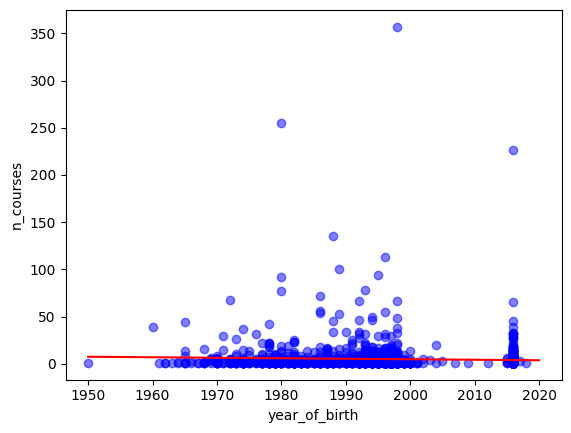

In [ ]:
# Hồi quy tuyến tín
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Prepare data
fname = '/content/drive/MyDrive/Colab Notebooks/Nhom_4/2. Thực Hành/Visualize Data/Translated Data/entities/user_filtered_by_year'
df_filtered = load_json(fname)
X = df_filtered['year_of_birth'].to_numpy().reshape(-1, 1)
y = df_filtered['n_courses']

# Build model and train model
reg = LinearRegression().fit(X, y)

# Infer
print(f'Weight  : {reg.coef_}')
print(f'Bias    : {reg.intercept_}')
print(f'Predict with year = 2000: {reg.predict([[2000]])}')

# Visualize
plt.plot(X, y, 'bo', alpha=0.5)
plt.xlabel('year_of_birth')
plt.ylabel('n_courses')

X_draw = [[1950], [2020]]
y_draw = reg.predict(X_draw)
plt.plot(X_draw, y_draw, 'r')

In [ ]:
# Hồi quy tuyến tính tổng quát

In [ ]:
# Hồi quy logistic

## 2.5. Khai phá tri thức

In [ ]:
fname = '/content/drive/MyDrive/Colab Notebooks/Nhom_4/2. Thực Hành/Visualize Data/Translated Data/entities/user_filtered_by_year'
df_filtered = load_json(fname)
df_filtered.head()

1802it [00:00, 8848.27it/s] 


,id,name,gender,school,year_of_birth,course_order,enroll_time,n_courses
0,U_22,我,0.0,,2015.0,"[682129, 2294668]","[2019-10-12 10:28:02, 2020-11-21 14:03:28]",2
1,U_53,于歆杰,1.0,清华大学,1973.0,"[696679, 1704639, 943255, 1729417, 682164, 177...","[2020-03-01 21:24:30, 2020-03-12 16:17:02, 202...",8
2,U_119,刘震,1.0,清华大学,1976.0,"[801420, 676905, 735273]","[2020-02-11 16:29:04, 2020-03-03 23:12:11, 202...",3
3,U_141,Ray,0.0,清华大学,1997.0,[697821],[2020-02-07 11:14:30],1
4,U_144,杜昊天,2.0,清华大学,1996.0,[696626],[2020-03-24 06:32:38],1


Nhận xét:


1.   Dựa vào bảng dữ liệu user.json trên có thể thấy trường id chứa giá trị id của học viên - đây là những giá trị unique nên không thể khai thác tri thức từ trường này, các trường như name, gender, school, year_of_birth, enroll_time là những trường thông tin đi kèm với học viên nên các giá trị này không biểu thị mối quan hệ với nhau giữa từng dòng dữ liệu.
2.   Cũng từ bảng dữ liệu trên có thể thấy thông tin chứa ở trường course_order là những khóa học mà các học viên đã lựa chọn, từ thông tin này chúng ta có thể tìm ra mối quan hệ giữa việc đăng ký khóa học của các học viên từ đó có thể giới thiệu hay đề xuất một khóa học cho học viên dựa trên những khóa học mà học viên đã học trước đó.

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
# Chọn cột 'course_order' để tạo transaction
transactions = df_filtered['course_order'].tolist()
transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[682129, 2294668],
 [696679, 1704639, 943255, 1729417, 682164, 1771179, 1836502, 1794464],
 [801420, 676905, 735273],
 [697821],
 [696626],
 [680824, 766203, 873864, 682443, 682222, 680845],
 [682155, 697374],
 [676969, 677010, 694136, 883345],
 [696724, 696826, 681299],
 [676969],
 [696729, 707096, 943255, 1704639, 1794464, 1821297, 734053],
 [2255373],
 [927961,
  697334,
  817148,
  682155,
  746971,
  943250,
  879069,
  1434547,
  837690,
  948432,
  756710,
  747024,
  922850,
  1907851,
  697206,
  1770304,
  1821297,
  943255,
  1124039,
  696679,
  2342532],
 [682193, 707173, 780844],
 [813711,
  697027,
  696679,
  1704639,
  784172,
  1772198,
  1794464,
  1821297,
  1926745,
  1928747],
 [682147,
  682322,
  682516,
  943255,
  883345,
  680759,
  676673,
  837985,
  677076,
  854862,
  947252,
  682742,
  1883823,
  1906706,
  1903985],
 [2019288],
 [948435,
  735362,
  707054,
  694143,
  697407,
  697398,
  1471283,
  696740,
  676913,
  948296],
 [696700],
 [696679,
  

In [ ]:
# Chuyển đổi dữ liệu thành dạng one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,629559,674903,674910,674912,674914,674920,674923,674924,674937,674938,...,2328542,2328543,2332739,2335244,2335763,2336296,2338353,2338758,2342532,2343522
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1798,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1799,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1800,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 2.5.1 Apriori algorithm
Thuật toán sẽ giúp tìm ra các itemset phổ biến

In [ ]:
# Sử dụng Apriori để tìm các mẫu phổ biến
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.028302,(629559)
1,0.020533,(674903)
2,0.022198,(674920)
3,0.011099,(676656)
4,0.015538,(676683)
5,0.029967,(676932)
6,0.016648,(676937)
7,0.013319,(676969)
8,0.017203,(677010)
9,0.012764,(677146)


Các itemsets ở trên đại diện cho tập các khóa học, giá trị support biểu thị tần số xuất hiện của tập các khóa học đó trong trường course_order. Dựa vào đây có thể thấy tồn tại 58 tập hợp khóa học xuất hiện trong course_order với tần số xuất hiện ít nhất là 1%. Số phần tử trong 58 tập khóa học có ít nhất là 1 phần tử và có nhiều nhất là 2 phần tử.

### 2.5.2 Association rules
Thuật toán giúp biểu diễn mối quan hệ giữa các mục trong các itemsets phổ biến được tìm thấy ở thuật toán Apriori

In [ ]:
# Sử dụng association_rules để tạo ra các quy tắc kết hợp
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(696994),(629559),0.059933,0.028302,0.010544,0.175926,6.216049,0.008848,1.179139,0.892624
1,(629559),(696994),0.028302,0.059933,0.010544,0.372549,6.216049,0.008848,1.498231,0.863567
2,(676683),(735351),0.015538,0.023307,0.010544,0.678571,29.113946,0.010182,3.038599,0.980894
3,(735351),(676683),0.023307,0.015538,0.010544,0.452381,29.113946,0.010182,1.797713,0.988696
4,(676937),(697791),0.016648,0.037181,0.013319,0.800000,21.516418,0.012700,4.814095,0.969667
5,(697791),(676937),0.037181,0.016648,0.013319,0.358209,21.516418,0.012700,1.532199,0.990346
6,(883345),(697791),0.049390,0.037181,0.011654,0.235955,6.346134,0.009817,1.260160,0.886192
7,(697791),(883345),0.037181,0.049390,0.011654,0.313433,6.346134,0.009817,1.384585,0.874955
8,(883345),(770738),0.049390,0.020533,0.017203,0.348315,16.963863,0.016189,1.502976,0.989944
9,(770738),(883345),0.020533,0.049390,0.017203,0.837838,16.963863,0.016189,5.862098,0.960779


Bảng thống kê ở trên đại diện cho các quy tắc kết hợp mà thuật toán association rules đã tìm thấy từ tập dữ liệu.

In [ ]:
# Dự đoán course_order cho các học viên mới
def predict_course_order(new_student_courses, rules):
    predicted_course_order = set()

    for index, rule in rules.iterrows():
        if all(course in new_student_courses for course in rule['antecedents']):
            predicted_course_order.update(rule['consequents'])

    return predicted_course_order

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Giả định `new_student_courses` là một danh sách các khóa học mà một học viên mới muốn đăng ký
new_student_courses = [696994]

# Dự đoán course_order cho học viên mới
predicted_order = predict_course_order(new_student_courses, rules)

print("Recommended course order:", predicted_order)

Recommended course order: {629559}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


# 3. Làm sạch dữ liệu

## 3.1. Xử lý dữ liệu trung lắp

In [ ]:
df['option'] = df['option'].apply(lambda x: tuple(sorted(x.items())) if x is not None else None)
df['context_id'] = df['context_id'].apply(lambda x: tuple(x) if x is not None else None)
df

,problem_id,title,content,option,answer,score,type,typetext,location,context_id,exercise_id,language
0,1730,Bài 1 Giới thiệu và Khuyến khích Ba Gia đình--...,1. Tử Chí Tông Kiến tập 1 ghi chép: Chí Huyền ...,"((A, Võ thuật xuất sắc, thành thạo nghệ thuật ...","[""B""]",1.0,1,Câu hỏi trắc nghiệm,1.4,"(8045581, 8045582, 8045583)",Ex_856,Chinese
1,1731,Bài 1 Giới thiệu và Khuyến khích Ba Gia đình--...,"2. ""Zi Zhi Tong Jian"" là một cuốn sách lịch sử...","((A, tiểu sử), (B, niên đại), (C, ghi chép lại...","[""B""]",1.0,1,Câu hỏi trắc nghiệm,1.4,"(8045581, 8045582, 8045583)",Ex_856,Chinese
2,1732,Bài 1 Giới thiệu và Khuyến khích Ba Gia đình--...,"3. Tên ban đầu của ""Zi Zhi Tong Jian"" là ____,...","((A, ""Tongjian""; Song Shenzong), (B, ""Tong Chi...","[""D""]",1.0,1,Câu hỏi trắc nghiệm,1.4,"(8045581, 8045582, 8045583)",Ex_856,Chinese
3,1733,Bài 1 Giới thiệu và Khuyến khích Ba Gia đình--...,4. “Tam gia” trong “Tam gia chia làm Tấn” ám c...,"((A, Ngụy Triệu Hàn), (B, Ngụy Hán Chí), (C, T...","[""A""]",1.0,1,Câu hỏi trắc nghiệm,1.4,"(8045581, 8045582, 8045583)",Ex_856,Chinese
4,1734,Bài 1 Giới thiệu và Khuyến khích Ba Gia đình--...,"5. Khi Trí Bá liên quân với quân Hán, quân Ngụ...","((A, Hàm Đan), (B, con trai cả), (C, Tấn Dương...","[""C""]",1.0,1,Câu hỏi trắc nghiệm,1.4,"(8045581, 8045582, 8045583)",Ex_856,Chinese
...,...,...,...,...,...,...,...,...,...,...,...,...
20084,60775,Chương 12 Kiểm tra,"19. Vào ngày 4 tháng 3 năm 1907, Tập đoàn Đườn...","((A, Riêng tư), (B, Thuộc về thương mại), (C, ...","[""B""]",1.0,1,Câu hỏi trắc nghiệm,12.5,"(6886173, 6886174, 6886175, 6886176, 6886177)",Ex_42347,Chinese
20085,60776,Chương 12 Kiểm tra,20. Trong quá trình triển khai thực tế việc gâ...,"((A, Cổ phiếu đường sắt), (B, phụ phí đường sắ...","[""D""]",1.0,1,Câu hỏi trắc nghiệm,12.5,"(6886173, 6886174, 6886175, 6886176, 6886177)",Ex_42347,Chinese
20086,60777,Chương 12 Kiểm tra,21. Cái gọi là đường trục quốc doanh của chính...,"((A, Các tuyến chính sẽ được quốc hữu hóa, các...","[""A""]",1.0,1,Câu hỏi trắc nghiệm,12.5,"(6886173, 6886174, 6886175, 6886176, 6886177)",Ex_42347,Chinese
20087,60778,Chương 12 Kiểm tra,22. Công ty Đường sắt Tứ Xuyên-Hankow gặp khó ...,"((A, Tứ Xuyên-Hán và Quảng Đông-Hán), (B, Tứ X...","[""A""]",1.0,1,Câu hỏi trắc nghiệm,12.5,"(6886173, 6886174, 6886175, 6886176, 6886177)",Ex_42347,Chinese


In [ ]:
print('num of duplicates: ',df.duplicated(keep = False).sum())

num of duplicates:  0


In [ ]:
cleaned_df = df.drop_duplicates()
df

,problem_id,title,content,option,answer,score,type,typetext,location,context_id,exercise_id,language
0,1730,Bài 1 Giới thiệu và Khuyến khích Ba Gia đình--...,1. Tử Chí Tông Kiến tập 1 ghi chép: Chí Huyền ...,"((A, Võ thuật xuất sắc, thành thạo nghệ thuật ...","[""B""]",1.0,1,Câu hỏi trắc nghiệm,1.4,"(8045581, 8045582, 8045583)",Ex_856,Chinese
1,1731,Bài 1 Giới thiệu và Khuyến khích Ba Gia đình--...,"2. ""Zi Zhi Tong Jian"" là một cuốn sách lịch sử...","((A, tiểu sử), (B, niên đại), (C, ghi chép lại...","[""B""]",1.0,1,Câu hỏi trắc nghiệm,1.4,"(8045581, 8045582, 8045583)",Ex_856,Chinese
2,1732,Bài 1 Giới thiệu và Khuyến khích Ba Gia đình--...,"3. Tên ban đầu của ""Zi Zhi Tong Jian"" là ____,...","((A, ""Tongjian""; Song Shenzong), (B, ""Tong Chi...","[""D""]",1.0,1,Câu hỏi trắc nghiệm,1.4,"(8045581, 8045582, 8045583)",Ex_856,Chinese
3,1733,Bài 1 Giới thiệu và Khuyến khích Ba Gia đình--...,4. “Tam gia” trong “Tam gia chia làm Tấn” ám c...,"((A, Ngụy Triệu Hàn), (B, Ngụy Hán Chí), (C, T...","[""A""]",1.0,1,Câu hỏi trắc nghiệm,1.4,"(8045581, 8045582, 8045583)",Ex_856,Chinese
4,1734,Bài 1 Giới thiệu và Khuyến khích Ba Gia đình--...,"5. Khi Trí Bá liên quân với quân Hán, quân Ngụ...","((A, Hàm Đan), (B, con trai cả), (C, Tấn Dương...","[""C""]",1.0,1,Câu hỏi trắc nghiệm,1.4,"(8045581, 8045582, 8045583)",Ex_856,Chinese
...,...,...,...,...,...,...,...,...,...,...,...,...
20084,60775,Chương 12 Kiểm tra,"19. Vào ngày 4 tháng 3 năm 1907, Tập đoàn Đườn...","((A, Riêng tư), (B, Thuộc về thương mại), (C, ...","[""B""]",1.0,1,Câu hỏi trắc nghiệm,12.5,"(6886173, 6886174, 6886175, 6886176, 6886177)",Ex_42347,Chinese
20085,60776,Chương 12 Kiểm tra,20. Trong quá trình triển khai thực tế việc gâ...,"((A, Cổ phiếu đường sắt), (B, phụ phí đường sắ...","[""D""]",1.0,1,Câu hỏi trắc nghiệm,12.5,"(6886173, 6886174, 6886175, 6886176, 6886177)",Ex_42347,Chinese
20086,60777,Chương 12 Kiểm tra,21. Cái gọi là đường trục quốc doanh của chính...,"((A, Các tuyến chính sẽ được quốc hữu hóa, các...","[""A""]",1.0,1,Câu hỏi trắc nghiệm,12.5,"(6886173, 6886174, 6886175, 6886176, 6886177)",Ex_42347,Chinese
20087,60778,Chương 12 Kiểm tra,22. Công ty Đường sắt Tứ Xuyên-Hankow gặp khó ...,"((A, Tứ Xuyên-Hán và Quảng Đông-Hán), (B, Tứ X...","[""A""]",1.0,1,Câu hỏi trắc nghiệm,12.5,"(6886173, 6886174, 6886175, 6886176, 6886177)",Ex_42347,Chinese
